## scripts to produce the heatmap (confusion matrix, antibody full version)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
sys.path.append("./")
import metrics
import utils

In [2]:
out_dir = "/bench_test3/output/reduction/"
ann_listlv1 = []
ann_listlv2 = []

root_dir = out_dir
# produce liger matching
lgx = pd.read_csv(root_dir+"lg/full_embed_x0.csv")
lgy = pd.read_csv(root_dir+"lg/full_embed_y0.csv")
lg_dist = utils.cdist_correlation(lgy.to_numpy(), lgx.to_numpy())
lg_full_match, lg_scores = metrics.get_knn_matching(lg_dist)
lgmatch = [lg_full_match,np.arange(lgy.shape[0]),lg_scores]
# harmony matching
hmx = pd.read_csv(root_dir+"hm/full_embed_x0.csv")
hmy = pd.read_csv(root_dir+"hm/full_embed_y0.csv")
hm_dist = utils.cdist_correlation(hmy.to_numpy(), hmx.to_numpy())
hm_full_match, hm_scores = metrics.get_knn_matching(hm_dist)
hmmatch = [hm_full_match,np.arange(hmy.shape[0]),hm_scores]
# bsc matching
bscx = pd.read_csv(root_dir+"bsc/full_embed_x0.csv")
bscy = pd.read_csv(root_dir+"bsc/full_embed_y0.csv")
bsc_dist = utils.cdist_correlation(bscy.to_numpy(), bscx.to_numpy())
bsc_full_match, bsc_scores = metrics.get_knn_matching(bsc_dist)
bscmatch = [bsc_full_match,np.arange(bscy.shape[0]),bsc_scores]
# load mf matching
mf = pd.read_csv(root_dir+"mf/full_idx.csv")
mfmatch = [mf['idx1'].tolist(),mf['idx2'].tolist(),mf['score'].tolist()]
# load sr matching
#sr = pd.read_csv(root_dir+"sr/full_idx.csv")
#srmatch = [sr['idx1'].tolist(),sr['idx2'].tolist(),sr['score'].tolist()]
srx = pd.read_csv(root_dir+"sr/full_embed_x0.csv")
sry = pd.read_csv(root_dir+"sr/full_embed_y0.csv")
sr_dist = utils.cdist_correlation(sry.to_numpy(), srx.to_numpy())
sr_full_match, sr_scores = metrics.get_knn_matching(sr_dist)
srmatch = [sr_full_match,np.arange(sry.shape[0]),sr_scores]

In [3]:
# read meta info
temp_dir = '/bench_test3/input/reduction/'
meta = pd.read_csv(temp_dir + 'meta.csv')
meta_lg1 = meta.drop(index = [19957], axis=0) # cell missing in liger x
#meta_lg1 = meta

In [4]:
ann_listlv1 = []
ann_listlv2 = []

annotationlv1 = meta['celltype.l1'].to_numpy()
annotationlv1_lg = meta_lg1['celltype.l1'].to_numpy()

order = (2, 1)
acc_ann_hm = metrics.get_matching_acc(
        matching=hmmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_lg = metrics.get_matching_acc(
        matching=lgmatch, 
        labels1=annotationlv1_lg, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_sr = metrics.get_matching_acc(
        matching=srmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_mf = metrics.get_matching_acc(
        matching=mfmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_bsc = metrics.get_matching_acc(
        matching=bscmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )
ann_listlv1.extend([acc_ann_mf, acc_ann_sr, acc_ann_lg, acc_ann_hm, acc_ann_bsc])


# lv2

annotationlv2 = meta['celltype.l2'].to_numpy()
annotationlv2_lg = meta_lg1['celltype.l2'].to_numpy()

order = (2, 1)
acc_ann_hm = metrics.get_matching_acc(
        matching=hmmatch, 
        labels1=annotationlv2, 
        labels2=annotationlv2,
        order = order
    )

acc_ann_lg = metrics.get_matching_acc(
        matching=lgmatch, 
        labels1=annotationlv2_lg, 
        labels2=annotationlv2,
        order = order
    )

acc_ann_sr = metrics.get_matching_acc(
        matching=srmatch, 
        labels1=annotationlv2, 
        labels2=annotationlv2,
        order = order
    )

acc_ann_mf = metrics.get_matching_acc(
        matching=mfmatch, 
        labels1=annotationlv2, 
        labels2=annotationlv2,
        order = order
    )

acc_ann_bsc = metrics.get_matching_acc(
        matching=bscmatch, 
        labels1=annotationlv2, 
        labels2=annotationlv2,
        order = order
    )
ann_listlv2.extend([acc_ann_mf, acc_ann_sr, acc_ann_lg, acc_ann_hm, acc_ann_bsc])


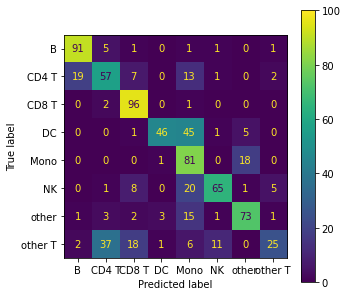

In [7]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[lgmatch[1]], annotationlv1[lgmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/bench_test3/plots/cm_lg.svg')

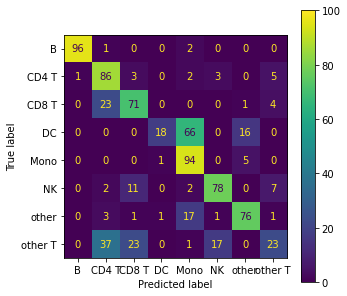

In [10]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[hmmatch[1]], annotationlv1[hmmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/bench_test3/plots/cm_hm.svg')

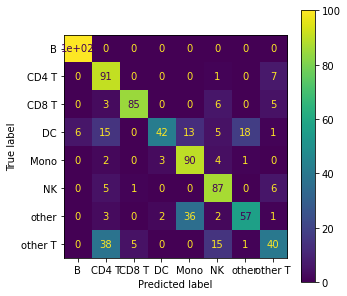

In [9]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[srmatch[0]], annotationlv1[srmatch[1]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/bench_test3/plots/cm_sr.svg')

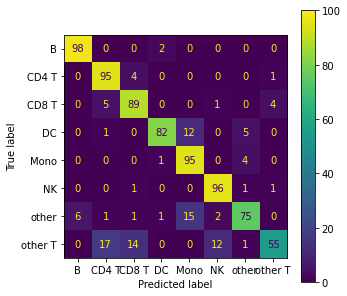

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[mfmatch[1]], annotationlv1[mfmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/bench_test3/plots/cm_mf.svg')

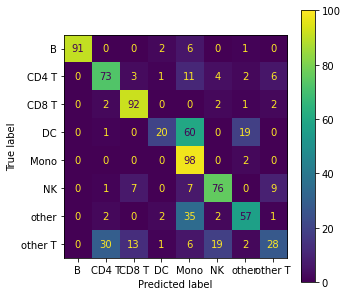

In [14]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[bscmatch[1]], annotationlv1[bscmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/bench_test3/plots/cm_bsc.svg')